In [1]:
from imutils import paths
import numpy as np
import argparse
import time
import sys
import cv2
import os
import matplotlib.pylab as plt

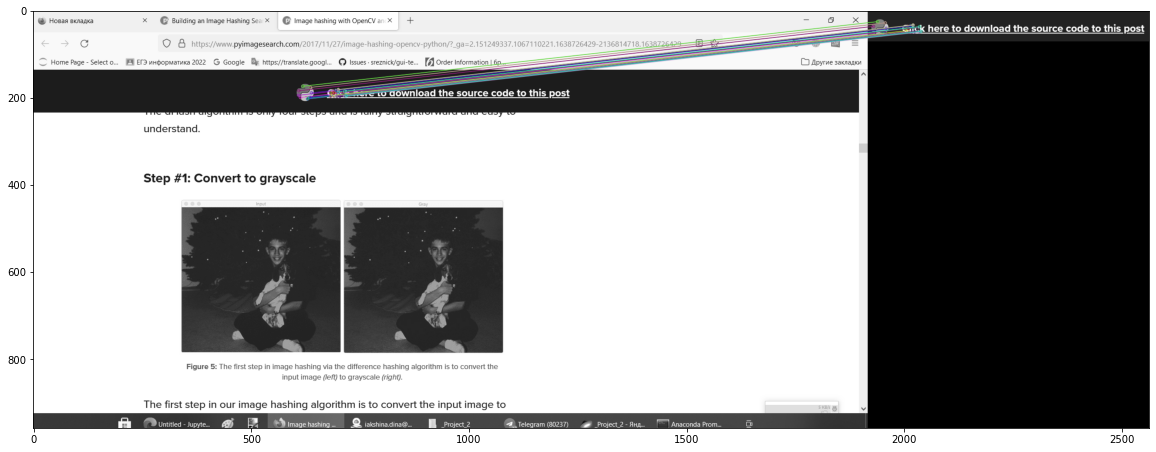

In [2]:

psd_img_1 = cv2.imread('screenshot.png', cv2.IMREAD_GRAYSCALE)
psd_img_2 = cv2.imread('p2.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()


psd_kp1, psd_des1 = sift.detectAndCompute(psd_img_1, None)
psd_kp2, psd_des2 = sift.detectAndCompute(psd_img_2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(psd_des1, psd_des2, k=2)
goodMatch = []
for m, n in matches:
    if m.distance < 0.50*n.distance:
        goodMatch.append(m)
goodMatch = np.expand_dims(goodMatch, 1)

img_out = cv2.drawMatchesKnn(psd_img_1, psd_kp1, psd_img_2, psd_kp2, goodMatch[:40], None, flags=2)

fig = plt.figure(figsize=(20,8))

plt.imshow(img_out,'gray')

src_pts = np.float32([ psd_kp1[m[0].queryIdx].pt for m in goodMatch]).reshape(-1,1,2)

In [3]:
src_pts =np.squeeze(src_pts)
src_pts[:10,:]

array([[609.3558 , 194.92578],
       [609.9074 , 184.62914],
       [609.9074 , 184.62914],
       [613.6429 , 200.08337],
       [619.75397, 174.18214],
       [619.75397, 174.18214],
       [630.1598 , 203.26346],
       [630.1598 , 203.26346],
       [630.1598 , 203.26346],
       [632.7739 , 201.23193]], dtype=float32)

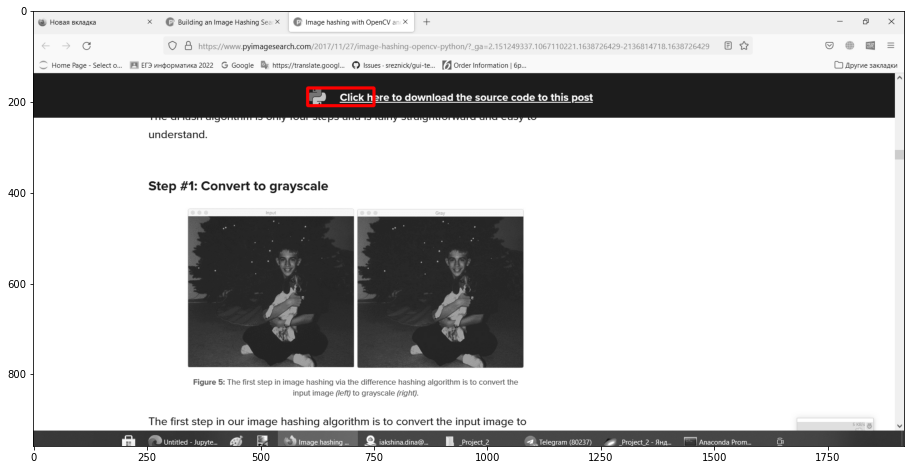

In [4]:
pt_min= tuple(map(int,src_pts[:60,:].min(0)))
pt_min= tuple(map(lambda x: x-5,pt_min))
pt_max= tuple(map(int,src_pts[:60,:].max(0)))
pt_max= tuple(map(lambda x: x+5,pt_max))

fig = plt.figure(figsize=(20,8))

# circle=cv2.circle(psd_img_1,pt_mean,40,(255,0,0),5)
img=psd_img_1
image=np.stack((img,img,img),axis=-1)

color=(255,0,0)
thickness=5
image = cv2.rectangle(image, pt_min, pt_max, color, thickness)


plt.imshow(image)